# Precios en tiempos de cólera

#### El salario cubano frente al costo de la canasta básica en MiPymes minoristas

En Cuba, el **precio** es sinónimo de decisión: determina qué puede comprar una persona con su salario en un mercado donde los precios suben sin límite y coexisten **dos tasas de cambio**. Entonces surge la pregunta: **¿Puede un cubano de la clase trabajadora adquirir los alimentos básicos?**

## Introducción

## Fuentes de datos

Para el desarrollo del análisis se realizó la recopilación de información de **30 MiPymes minorista**, considerando un conjunto mínimo de 10 productos de consumo básico (alimentos). A partir de esta información se obtuvieron precios reales del mercado local, como fuente principal.

Como complemento, se utilizaron fuentes de información externas relacionadas con el **salario mensual** del trabajador cubano y las **tasas de cambio** vigentes, con el objetivo de apreciar los precios y permitir comparaciones económicas. También, se realizó la extracción de precios de productos en páginas web que operan en divisa.

### Bibliotecas:

In [1]:
from m_tools import *
from m_normalize import *
from m_charts import *

In [5]:
print(f'Cantidad de MiPymes: {data_count}')

Cantidad de MiPymes: 8


In [6]:
CountProducts2()

{'tic toc': 21,
 "ale's supermarket": 21,
 "bodegón d'k": 36,
 'la nenita': 15,
 'bodegón, las duras': 15,
 'bodegón oasis': 11,
 'kaluch market': 14,
 'xalxa': 4}

## Canasta:

In [7]:
Basket('basket.json')

## Chart 1: Precio promedio por producto

Aqui se puede visualizar el **precio promedio** de los alimentos recopilados en distintas MiPymes. Cada barra representa el **valor medio** al que un consumidor puede encontrar en un mercado minorista.

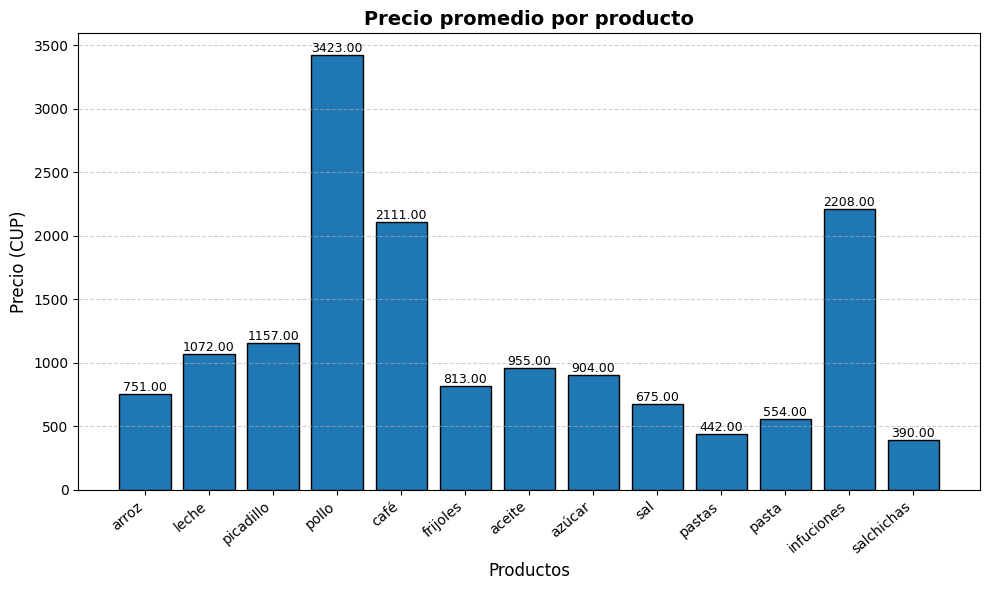

In [3]:
def ChartAverageProducts():
    data = AverageProducts()
    products = list(data.keys())
    averages = list(data.values())

    plt.figure(figsize=(10, 6))  # tamaño de la gráfica

    bars = plt.bar(
        products,
        averages,
        edgecolor='black',
        linewidth=1
    )

    plt.title('Precio promedio por producto', fontsize=14, fontweight='bold')
    plt.xlabel('Productos', fontsize=12)
    plt.ylabel('Precio (CUP)', fontsize=12)

    plt.xticks(rotation=40, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Mostrar valor encima de cada barra
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=9
        )

    plt.tight_layout()
    plt.show()

ChartAverageProducts()


El **precio promedio** se utiliza como una medida para facilitar la comparación de productos.

## Chart 2: Variabilidad de precios

Podemos visualizar la **distribución de los precios** de cada producto. A diferencia de la gráfica anterior, no se utiliza un valor único, sino se visualiza como se **concentran** y **dispersan** los precios.

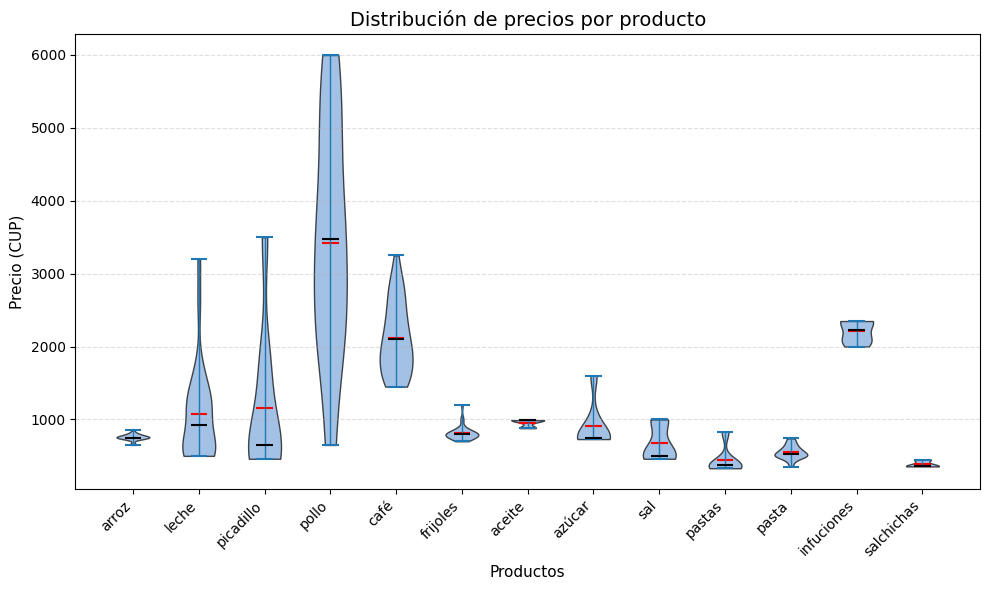

In [4]:
def ChartVariabilityPrices():
    products = list(ListProducts().keys())
    prices = list(ListProducts().values())

    plt.figure(figsize=(10, 6))

    violins = plt.violinplot(
        prices,
        showmeans=True,
        showmedians=True,
        showextrema=True
    )

    # Personalización de los violines
    for body in violins['bodies']:
        body.set_facecolor('#7DA7D9')
        body.set_edgecolor('black')
        body.set_alpha(0.7)

    violins['cmeans'].set_color('red')
    violins['cmedians'].set_color('black')
    violins['cbars'].set_linewidth(1)

    plt.title("Distribución de precios por producto", fontsize=14)
    plt.xlabel("Productos", fontsize=11)
    plt.ylabel("Precio (CUP)", fontsize=11)

    plt.xticks(range(1, len(products) + 1), products, rotation=45, ha='right')

    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

ChartVariabilityPrices()

Cada violín muestra la densidad de precios para un producto en especifico, así no solo se analiza valores centrales. Analiza la frecuencia relativa de precios **altos** y **bajos**.

## Chart 3.1: Comparación de Canasta/Salario

Aquí se compara el precio total de la **canasta básica** con el **salario promedio** como evidencia de una **brecha económica** entre el ingreso del trabajador y el costo alimenticio

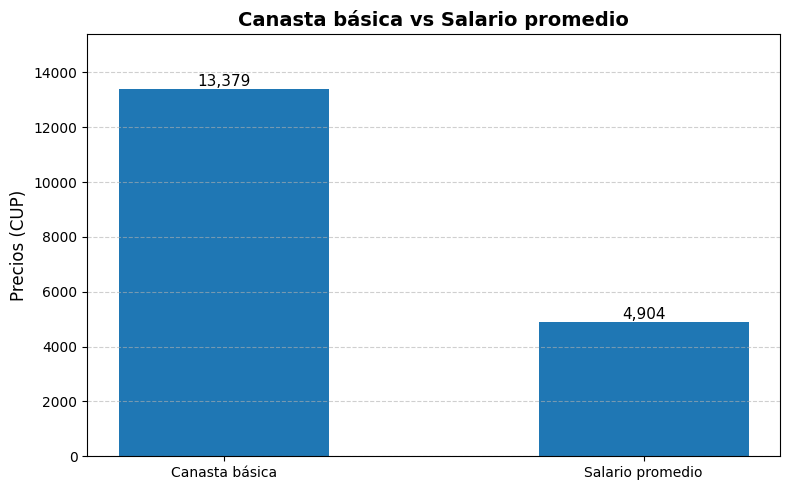

In [8]:
def ChartCostBasket():
    labels = ['Canasta básica', 'Salario promedio']
    values = [CostBasket(), AverageSalarie(1)]

    plt.figure(figsize=(8, 5))

    bars = plt.bar(labels, values, width=0.5)

    plt.title('Canasta básica vs Salario promedio', fontsize=14, fontweight='bold')
    plt.ylabel('Precios (CUP)', fontsize=12)

    # Rejilla horizontal
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Mostrar valores encima de cada barra
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:,.0f}',
            ha='center',
            va='bottom',
            fontsize=11
        )

    # Ajustar límites para que no queden pegadas al borde
    plt.ylim(0, max(values) * 1.15)

    plt.tight_layout()
    plt.show()

ChartCostBasket()

## Chart 3.2: Comparación de Canasta/Salario

Aquí se compara el **salario promedio mensual** de un cubano de clase trabajadora con el **costo estimado** de cada producto. El **salario promedio mensual** se utiliza como un límite sobre si se puede adquirir 'x' producto.

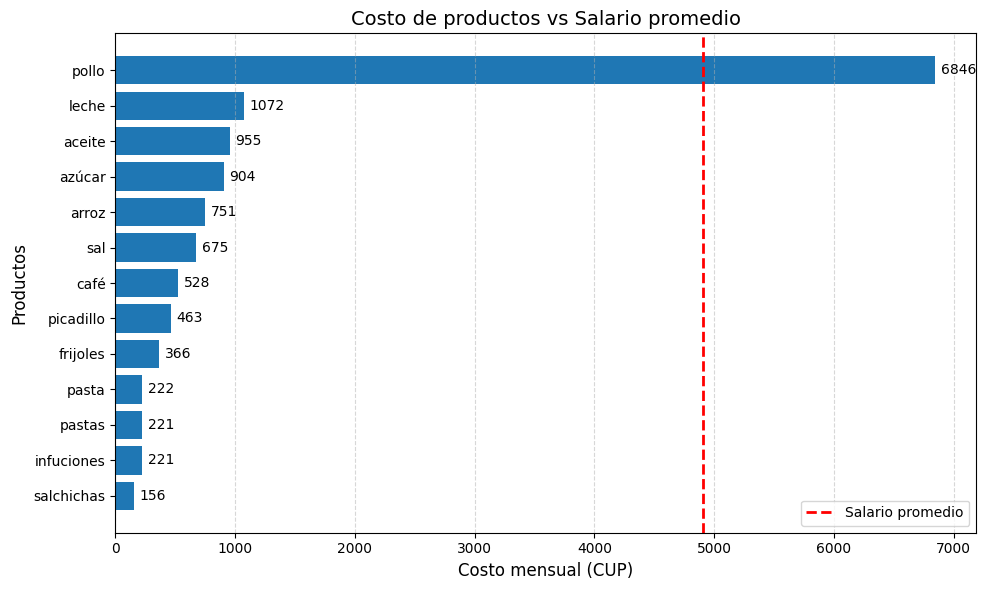

In [9]:
def ChartCostBasket2():
    data = CostBasket2()
    products = list(data.keys())
    prices = list(data.values())

    # Ordenar por precio (mejora lectura)
    products, prices = zip(*sorted(zip(products, prices), key=lambda x: x[1]))

    plt.figure(figsize=(10, 6))

    bars = plt.barh(products, prices)

    # Línea del salario promedio
    avg_salary = AverageSalarie(1)
    plt.axvline(
        x=avg_salary,
        linestyle='--',
        linewidth=2,
        color='red',
        label='Salario promedio'
    )

    # Etiquetas de valor en cada barra
    for bar in bars:
        width = bar.get_width()
        plt.text(
            width + avg_salary * 0.01,
            bar.get_y() + bar.get_height() / 2,
            f'{width:.0f}',
            va='center'
        )

    plt.title('Costo de productos vs Salario promedio', fontsize=14)
    plt.xlabel('Costo mensual (CUP)', fontsize=12)
    plt.ylabel('Productos', fontsize=12)

    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

ChartCostBasket2()

Se calculó la **canasta básica** a partir del precio promedio y su gramaje. Y también se utilizó del **salario promedio mensual** como una referencia del poder adquisitivo. No se analiza los **salarios individuales** ni **ocupaciones**.

## Chart 4: Porcentaje del salario

Se muestra en la gráfica el **% del salario necesario** para comprar un producto de la **canasta básica**.

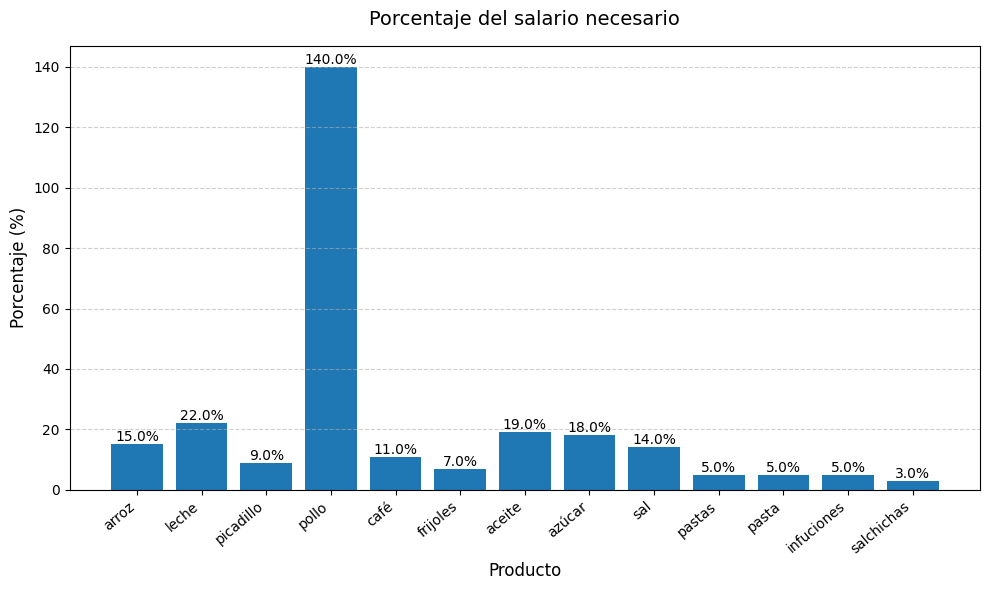

In [10]:
def ChartPercetSalary():
    data = PercentSalary()
    products = list(data.keys())
    percents = list(data.values())

    plt.figure(figsize=(10, 6))
    plt.bar(products, percents)

    plt.title('Porcentaje del salario necesario', fontsize=14, pad=15)
    plt.ylabel('Porcentaje (%)', fontsize=12)
    plt.xlabel('Producto', fontsize=12)

    plt.xticks(rotation=40, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Mostrar valores encima de cada barra
    for i, value in enumerate(percents):
        plt.text(i, value, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

ChartPercetSalary()

## Chart 5: Días necesarios

Aquí se convierten los precios de los productos en **días laborales** necesarios para adquirir los productos.

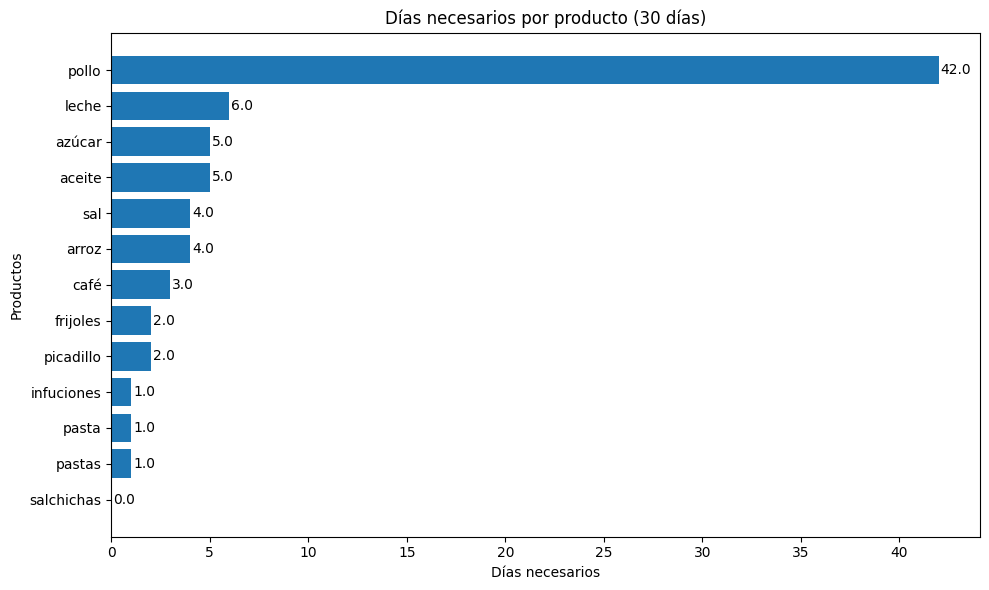

In [13]:
def ChartNecesaryDays(day):
    data = NecesaryDays(day)
    products = list(data.keys())
    days = list(data.values())

    # Ordenar por días (opcional pero muy recomendable)
    products, days = zip(*sorted(zip(products, days), key=lambda x: x[1]))

    plt.figure(figsize=(10, 6))

    bars = plt.barh(products, days)

    # Etiquetas y título
    plt.xlabel("Días necesarios")
    plt.ylabel("Productos")
    plt.title(f"Días necesarios por producto ({day} días)")

    # Mostrar valores sobre las barras
    for bar in bars:
        width = bar.get_width()
        plt.text(
            width + 0.1,
            bar.get_y() + bar.get_height() / 2,
            f"{width}",
            va="center"
        )

    # Mejorar márgenes
    plt.tight_layout()

    plt.show()

ChartNecesaryDays(30)

### Metodología:

* Se basa en **salario promedio**.
* Se utiliza **gramaje promedio** de cada producto.

In [16]:
def TimeLine3(product) -> tuple:
    """
    Devuelve las fechas y precios asociados a un producto específico.
    """
    dates = []
    prices = []

    for pyme in pymes:
        for prod in pyme.get('products', []):
            if prod['category'] == product:
                for record in prod.get('records', []):
                    dates.append(record['date'])
                    prices.append(record['price'])

    # Mantener relación fecha ↔ precio y ordenar temporalmente
    dates, prices = zip(*sorted(zip(dates, prices)))
    return list(dates), list(prices)

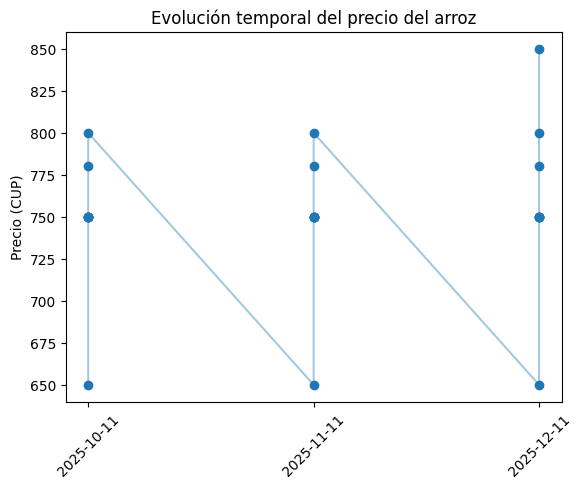

In [17]:
dates, prices = TimeLine3('arroz')
plt.scatter(dates, prices)
plt.plot(dates, prices, alpha=0.4)
plt.xticks(rotation=45)
plt.ylabel('Precio (CUP)')
plt.title('Evolución temporal del precio del arroz')
plt.show()